In [4]:
import pandas as pd 
import numpy as np

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()

In [ ]:
data

In [ ]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [ ]:
df["MedHouseVal"]= data["target"]

In [ ]:
df

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = df.drop("MedHouseVal", axis=1)
Y = df["MedHouseVal"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
reg = RandomForestRegressor()

reg.fit(X_train,Y_train)

In [ ]:
reg.score( X_test, Y_test)

In [ ]:
Y_test.mean()

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

sc = r2_score(Y_test,Y_pred)

In [ ]:
r2_score(Y_test,Y_test)

In [ ]:
test = np.full(len(Y_test),1)

In [ ]:
r2_score(Y_test,test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, Y_pred)

### MAE using formulas and differences

In [ ]:
error_df = pd.DataFrame({"actual values": Y_test, "predicted values": Y_pred})
error_df["diffrence"] = error_df["predicted values"] - error_df["actual values"]


In [ ]:
error_df.head()

In [ ]:
np.abs(error_df["diffrence"]).mean()

In [ ]:
np.abs(error_df["diffrence"])

## Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred)


In [ ]:
error_df["diffrence squareed"] = np.square(error_df["diffrence"])

In [ ]:
error_df.head()

In [ ]:
error_df["diffrence squareed"].mean()

In [ ]:
error_df.iloc[0]["diffrence squareed"] =16

In [ ]:
error_df.iloc[0]

# Improving a Model

First Prediction = baseline prediction
First model = baseline model

From Data Persperctive :
 - Could we collect more data? (generally more data, the better)
 - could we improve our data?

From Model Perspective:
 - Is there a better model we could use?
 - could we improve our current Model 

Three Ways to adjust hyperparameters: 
- By hand
- Randomly with RandomSearchCV
- Exhautively with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

In [ ]:
clf.get_params()

## Tunning Hyperparameter with hand
Lets Make Three Sets

We are going to adjust:
- `max_depth`
-  `max_feature`
-  `min_sample_leaf`
-  `min_samples_split`
-  `n_estimators`


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_preds(y_true, y_pred):
    """
    Perform evaluation comparison on y_true labels vs y_pred labels
    """

    # Calculate metrics
    accuracy = round(accuracy_score(y_true, y_pred), 2)
    precision = round(precision_score(y_true, y_pred), 2)
    recall = round(recall_score(y_true, y_pred), 2)
    f1 = round(f1_score(y_true, y_pred), 2)

    # Create a dictionary with descriptive string keys
    metric_dict = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

    # Print results using the correct dictionary keys
    print(f"accuracy : {metric_dict['accuracy']*100:.2f}%")
    print(f"precision : {metric_dict['precision']:.2f}")
    print(f"recall : {metric_dict['recall']:.2f}")
    print(f"f1 : {metric_dict['f1']:.2f}")

    return metric_dict

In [7]:
heart_disease_df = pd.read_csv('./data/heart-disease.csv')
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the Data

heart_disease_df_shuffled = heart_disease_df.sample(frac=1)

X = heart_disease_df_shuffled.drop('target', axis=1)
Y = heart_disease_df_shuffled['target']

# Spilt the data into train test and validation

train_split = round(0.7*len(heart_disease_df_shuffled))
valid_split = round(train_split+0.15*len(heart_disease_df_shuffled))

X_train, Y_train = X[:train_split], Y[:train_split]

X_valid, Y_valid = X[train_split:valid_split], Y[train_split:valid_split]

X_test, Y_test = X[valid_split:], Y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [19]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Make Baseline prediction
y_preds = clf.predict(X_valid)

# evaluate the classifier on validation set

basline_matrics = evaluate_preds(Y_valid, y_preds)
basline_matrics

accuracy : 82.00%
precision : 0.81
recall : 0.88
f1 : 0.85


{'accuracy': 0.82,
 'precision': np.float64(0.81),
 'recall': np.float64(0.88),
 'f1': np.float64(0.85)}

In [20]:
clf1 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10
    
)
clf1.fit(X_train, Y_train)

# Make Baseline prediction
y_preds = clf1.predict(X_valid)

# evaluate the classifier on validation set

clf1_mat = evaluate_preds(Y_valid, y_preds)
clf1_mat

accuracy : 82.00%
precision : 0.84
recall : 0.84
f1 : 0.84


{'accuracy': 0.82,
 'precision': np.float64(0.84),
 'recall': np.float64(0.84),
 'f1': np.float64(0.84)}

## Hyperparameter tuning with RandomizedSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

X = heart_disease_df_shuffled.drop("target", axis=1)
Y = heart_disease_df_shuffled["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# setup Randomized Search CV


res_clf = RandomizedSearchCV(
    estimator=clf, param_distributions=grid, n_iter=50, cv=5, verbose=2)

res_clf.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

d:\ML and Data Science\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML and Data Science\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML and Data Science\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\ML and Data Science\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\ML and Data Science\.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [22]:
res_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [23]:
# Make Prediction with best hyperparameter

res_y_preds = res_clf.predict(X_test)

res_metrics = evaluate_preds(Y_test,res_y_preds)

accuracy : 84.00%
precision : 0.78
recall : 0.89
f1 : 0.83


# Hyperparameter training with  GridSearchCV

In [24]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [25]:
grid2 = {'n_estimators': [ 100, 200,500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [ 6],
 'min_samples_leaf': [1, 2]
 }

In [26]:
from sklearn.model_selection import GridSearchCV

np.random.seed(2)

X = heart_disease_df_shuffled.drop("target", axis=1)
Y = heart_disease_df_shuffled["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# setup Grid Search CV

gs_clf = GridSearchCV(
    estimator=clf, param_grid=grid2,cv=5, verbose=2)

gs_clf.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

d:\ML and Data Science\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML and Data Science\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML and Data Science\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\ML and Data Science\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\ML and Data Science\.ven

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [27]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [28]:
pred = gs_clf.predict(X_test)

In [29]:
gs_mat = evaluate_preds(Y_test,pred)

accuracy : 79.00%
precision : 0.79
recall : 0.81
f1 : 0.80


# Comparing different model metrices



In [31]:
compare = pd.DataFrame({
    "baseline":basline_matrics,
    "clf_1":clf1_mat,
    "res_clf":res_metrics,
    "gs_clf":gs_mat
})

<Axes: >

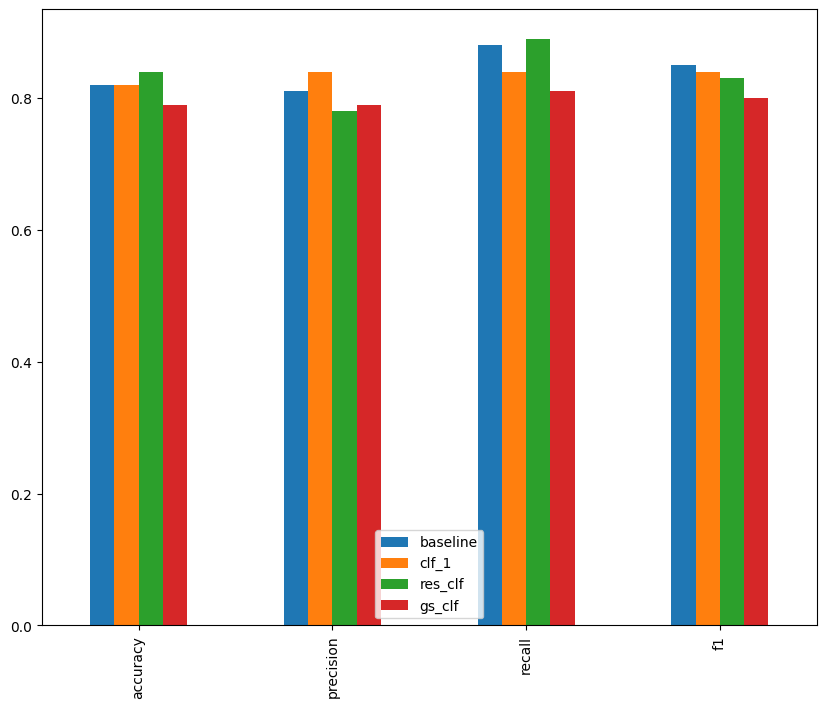

In [32]:
compare.plot.bar(figsize=(10,8))

# Saving and loading Machine Learning Model

Two ways to save and load machine learning model
 - With Python's `pickle` module
 - with the `joblib` module

In [54]:
import pickle

# Save an existing model to file

pickle.dump(gs_clf,open("./models/gs_random_forest_model_1.pkl","wb"))

In [55]:
mdl = pickle.load(open("./models/gs_random_forest_model_1.pkl","rb"))

In [56]:
mdl.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Colour
- Doors
- Make
- Odometer (KM)
Feature names seen at fit time, yet now missing:
- age
- ca
- chol
- cp
- exang
- ...


In [ ]:
# joblib

from joblib import dump, load

dump(gs_clf,filename="./models/gs_random_forest_model_1.joblib")

['./models/gs_random_forest_model_1.joblib']

In [ ]:
mdl = load(filename="./models/gs_random_forest_model_1.joblib")

In [ ]:
mdl.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

# Putting it all together

In [ ]:
data = pd.read_csv("./data/car-sales-extended-missing-data.csv")

data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [ ]:
data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
data

In [70]:
# Getting Data Ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Setup Random Seed
import numpy as np
np.random.seed(42)

# Import Data and drop rows with missing labels
data = pd.read_csv("./data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)


# Define different features and transformer pipeline

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
           ("onehot", OneHotEncoder(handle_unknown="ignore"))
           ]
)

door_features = ["Doors"]
door_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4)),]
)

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")),]
)

# setup preprocessing steps (fill missing values then convert to number)

preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_features),
    ("num", numeric_transformer, numeric_feature),
])


# Create a preprocessing and modelling steps

model = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("model",RandomForestRegressor()),
        
    ]
)

# Spilit Data

X = data.drop("Price",axis=1)
Y = data["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.22188417408787875

Its also possible to use `GridSearchCV` or `RandomizeSearchCV` with our `pipeline`

In [73]:
# Use GridSearchCV with regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_mdl = GridSearchCV(model, param_grid=pipe_grid, cv=5, verbose=2)
gs_mdl.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [74]:
gs_mdl.score(X_test,Y_test)

0.2848784564026805